In [ ]:
#importing packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

# Load Data

In [ ]:
df = pd.read_csv(r'D:\File\Speaker\Pacmann\Event 2\bike_data.csv')  #ganti dengan destinasi folder masing-masing
df['date'] = pd.to_datetime(df['date'])
df

,date,station_id,name,bikes_available,docks_available
0,2013-08-29,2,San Jose Diridon Caltrain Station,2,24
1,2013-08-30,2,San Jose Diridon Caltrain Station,5,21
2,2013-08-31,2,San Jose Diridon Caltrain Station,12,14
3,2013-09-01,2,San Jose Diridon Caltrain Station,10,16
4,2013-09-02,2,San Jose Diridon Caltrain Station,11,15
...,...,...,...,...,...
75749,2016-08-27,91,Cyril Magnin St at Ellis St,3,31
75750,2016-08-28,91,Cyril Magnin St at Ellis St,3,32
75751,2016-08-29,91,Cyril Magnin St at Ellis St,3,31
75752,2016-08-30,91,Cyril Magnin St at Ellis St,4,30


# Data Overview

In [ ]:
df.isna().sum()

date               0
station_id         0
name               1
bikes_available    0
docks_available    0
dtype: int64

In [ ]:
df[df['name'].isna()]

,date,station_id,name,bikes_available,docks_available
75721,2016-07-18,87,NaN,0,0


In [ ]:
#drop null
df = df.dropna()

In [ ]:
#number of stations
print('Number of stations:',len(np.unique(df['name'])))

Number of stations: 74


In [ ]:
df.describe()

,station_id,bikes_available,docks_available
count,75753.000000,75753.000000,75753.000000
mean,42.733912,7.726691,9.013914
std,23.846855,3.231423,3.479549
min,2.000000,0.000000,0.000000
25%,24.000000,5.000000,7.000000
50%,42.000000,7.000000,9.000000
75%,64.000000,10.000000,11.000000
max,91.000000,24.000000,32.000000


# Plot Daily

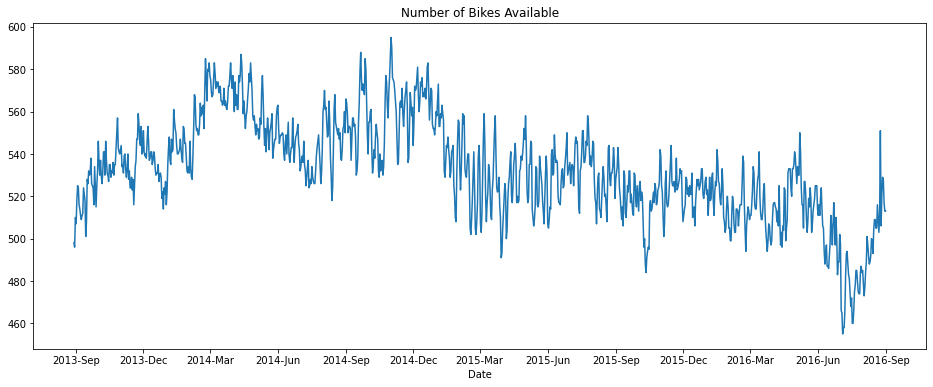

In [ ]:
T = df.groupby(['date']).agg({'bikes_available' : 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(T['date'], T['bikes_available'])
plt.xlabel('Date')
plt.ylabel('')
plt.title('Number of Bikes Available')
date_form = DateFormatter("%Y-%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.ticklabel_format(style='plain', axis='y')

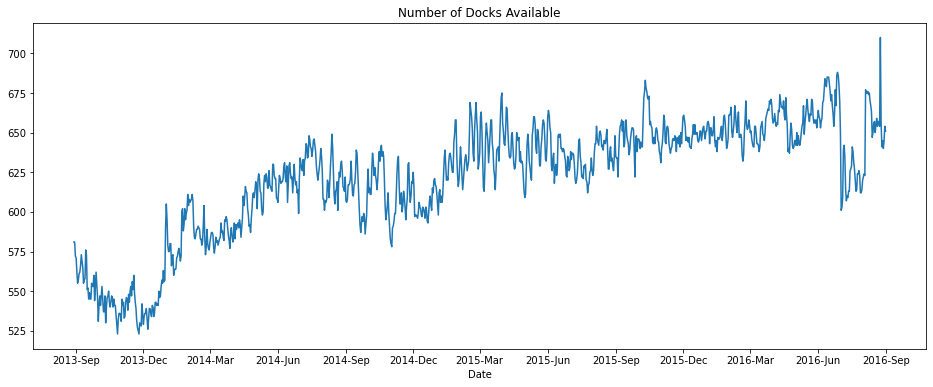

In [ ]:
T = df.groupby(['date']).agg({'docks_available' : 'sum'}).reset_index()

fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(T['date'], T['docks_available'])
plt.xlabel('Date')
plt.ylabel('')
plt.title('Number of Docks Available')
date_form = DateFormatter("%Y-%b")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.ticklabel_format(style='plain', axis='y')

# Plot Monthly

Text(0.5, 1.0, 'Month Number Bikes Available')

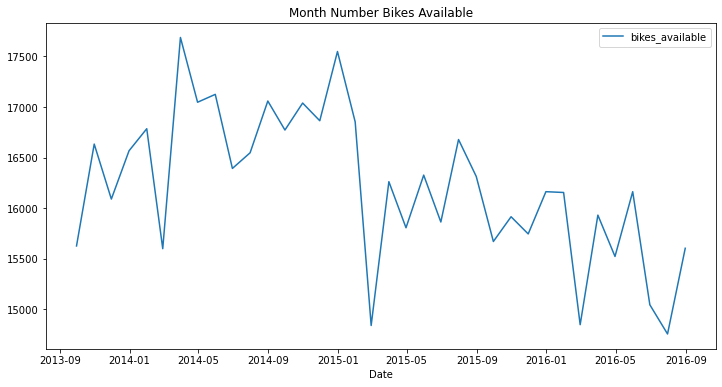

In [ ]:
#T = df.groupby(['date']).agg({'bikes_available' : 'sum'})
T = df[df['date']>='2013-09-01'].groupby(['date']).agg({'bikes_available' : 'sum'})
monthly = T.resample('M').sum()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly)
plt.xlabel('Date')
plt.title('Month Number Bikes Available')

In [ ]:
set(df[df['date']<'2013-09-01']['date'])

{Timestamp('2013-08-29 00:00:00'),
 Timestamp('2013-08-30 00:00:00'),
 Timestamp('2013-08-31 00:00:00')}

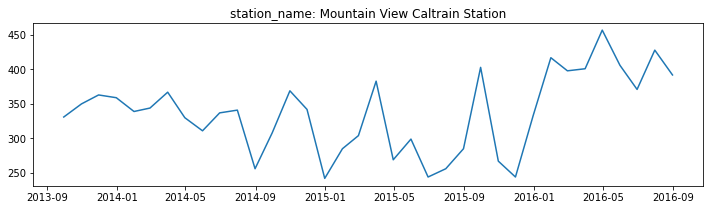

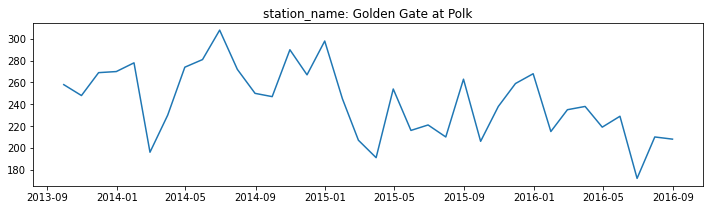

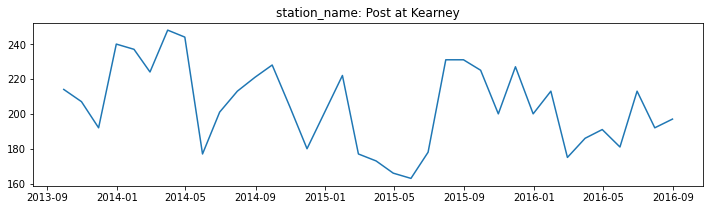

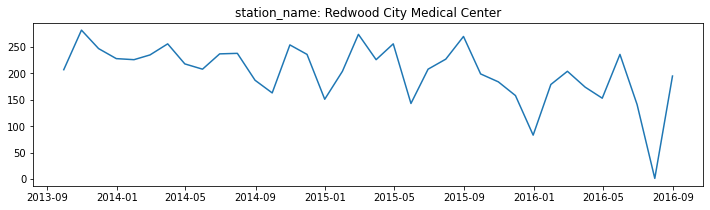

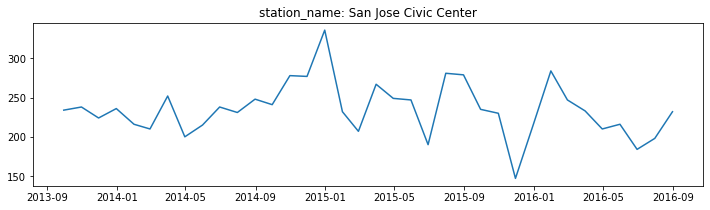

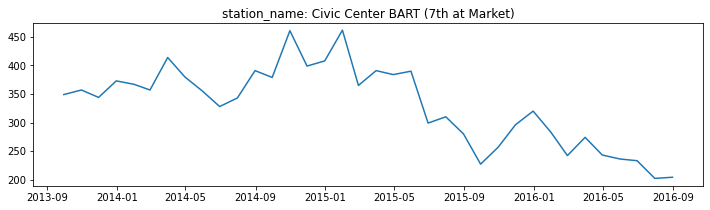

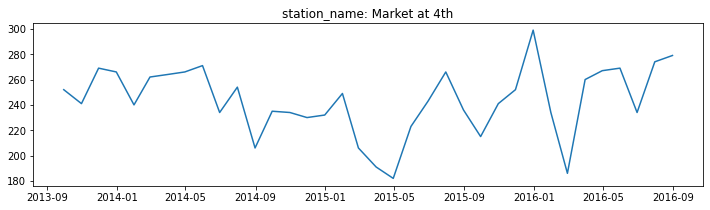

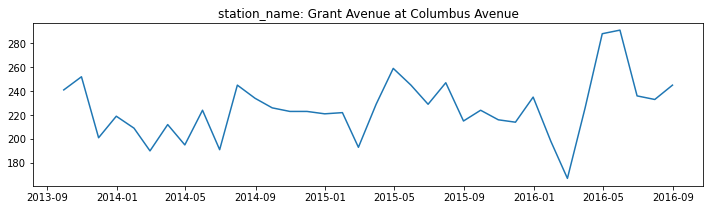

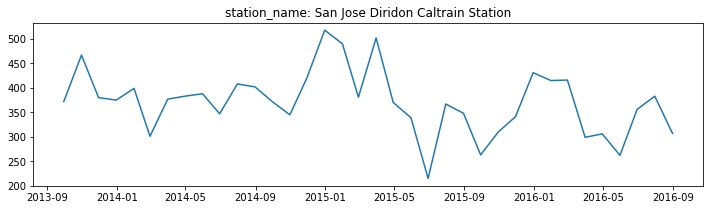

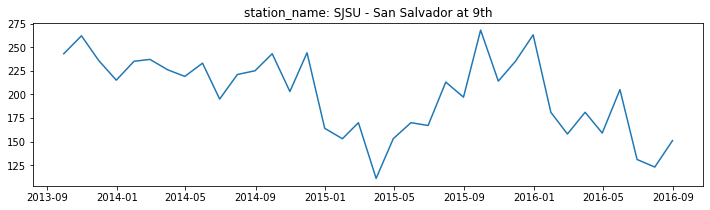

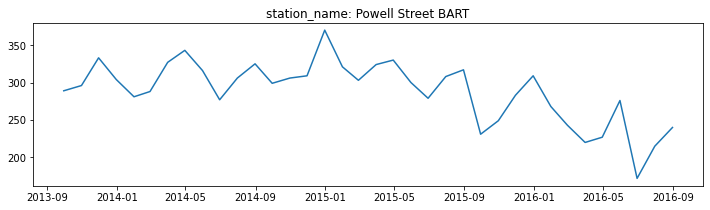

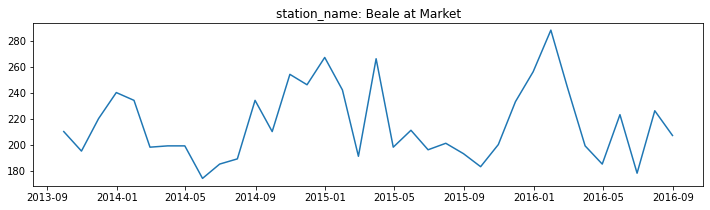

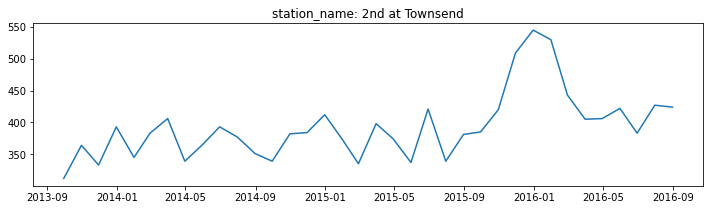

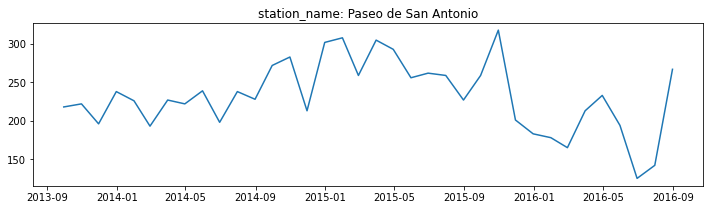

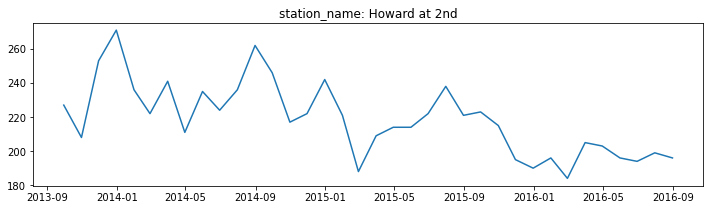

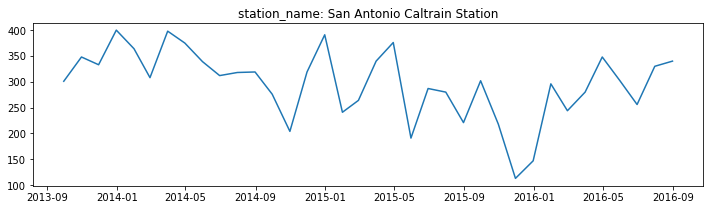

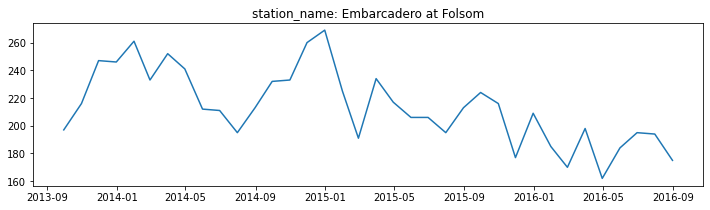

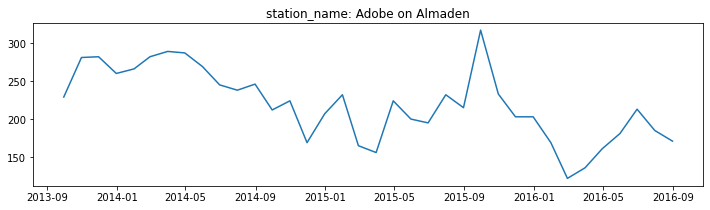

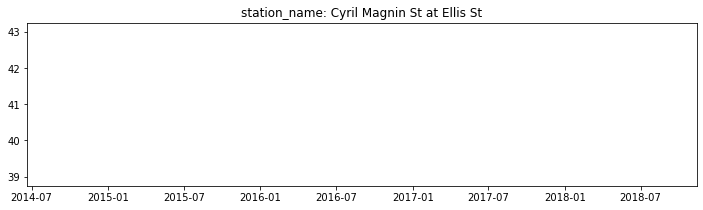

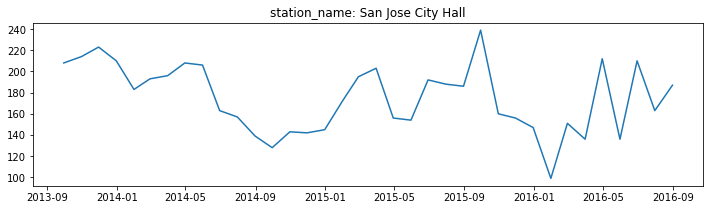

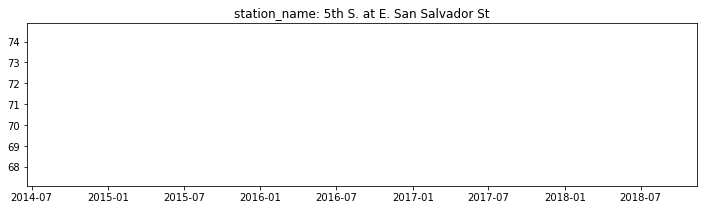

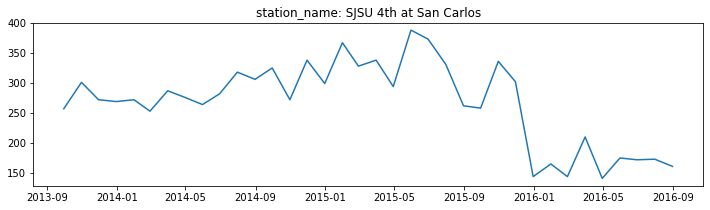

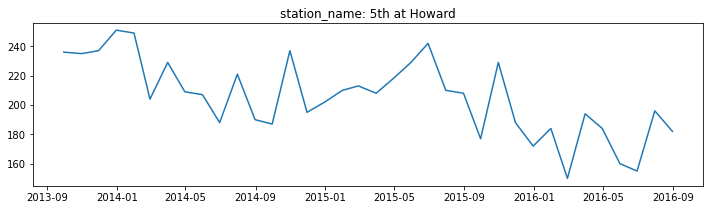

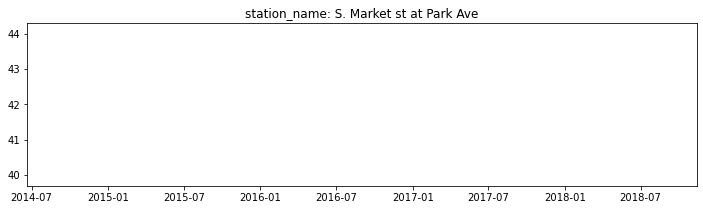

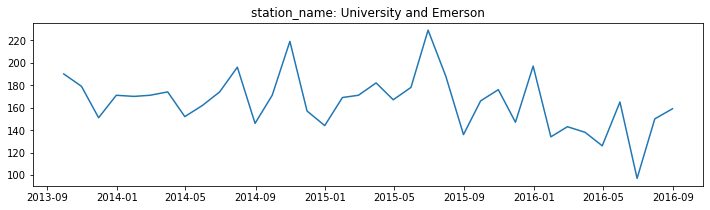

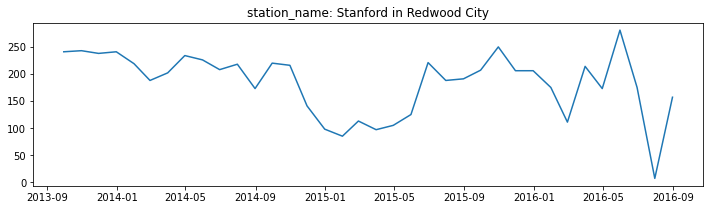

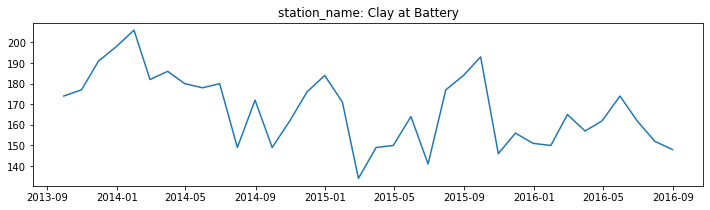

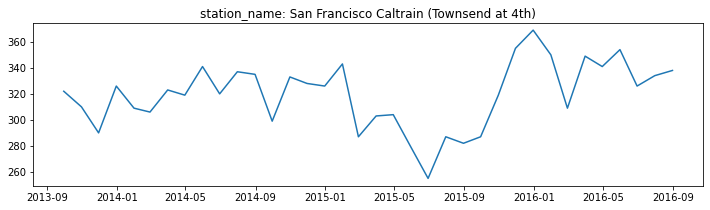

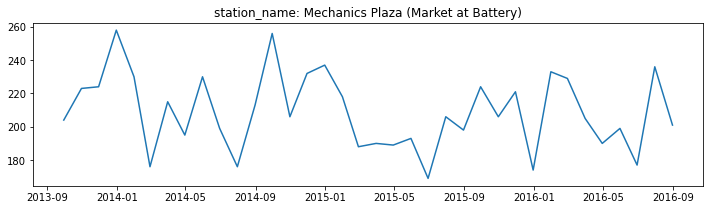

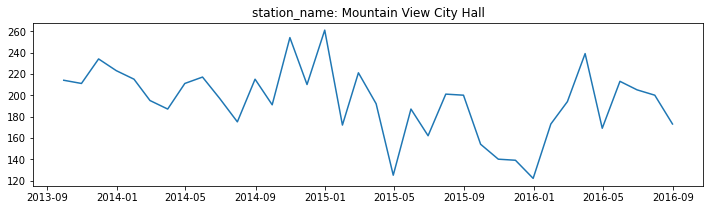

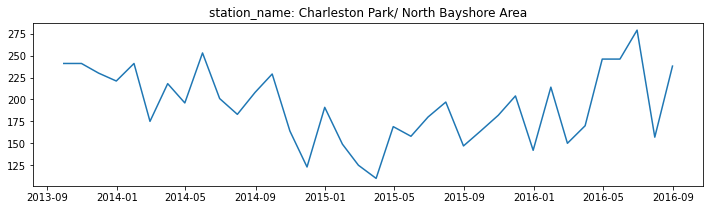

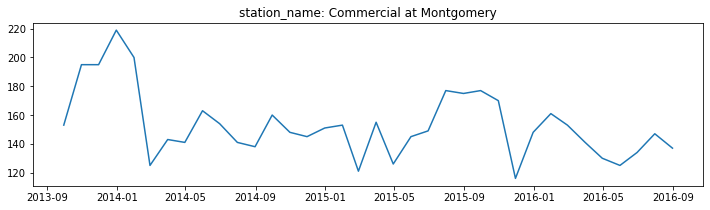

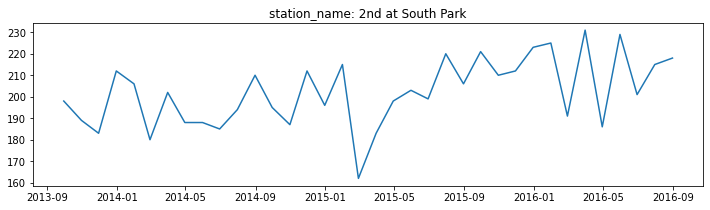

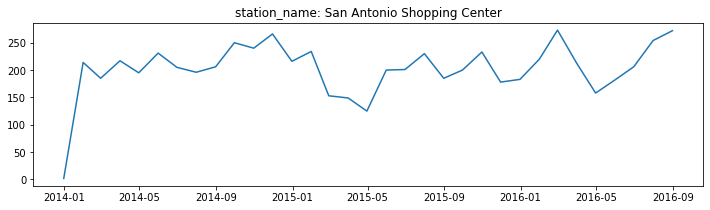

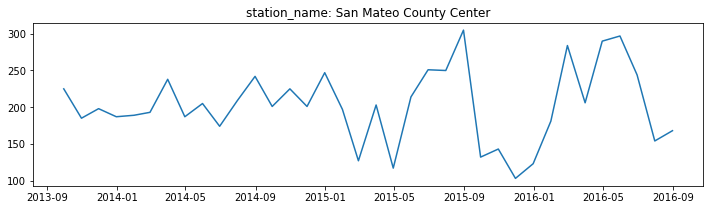

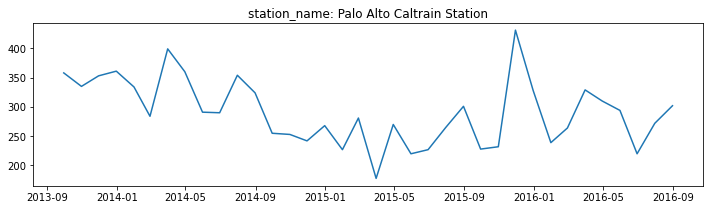

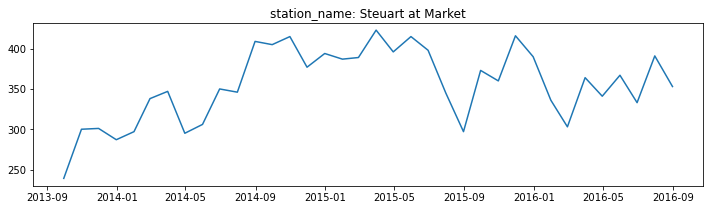

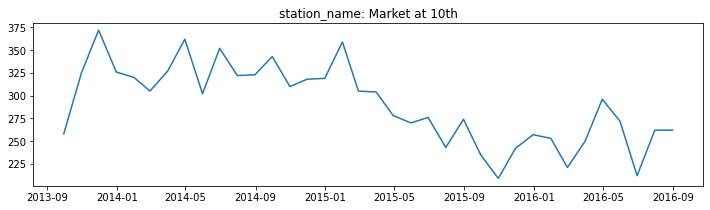

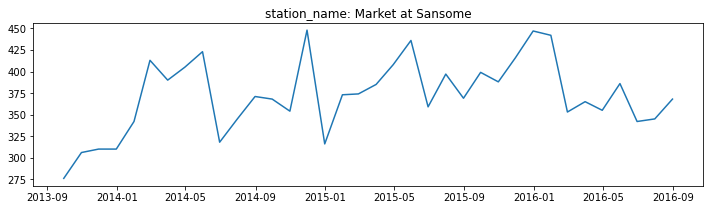

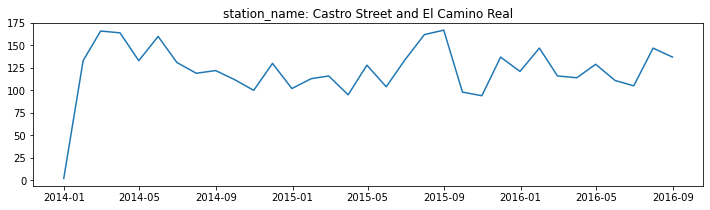

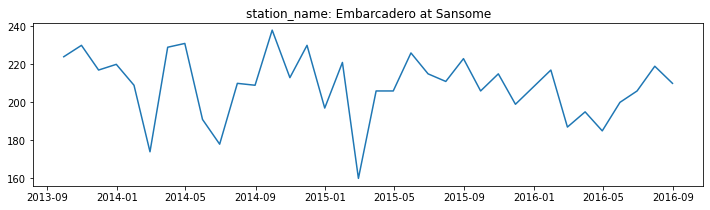

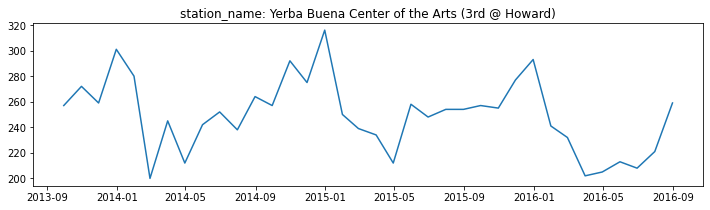

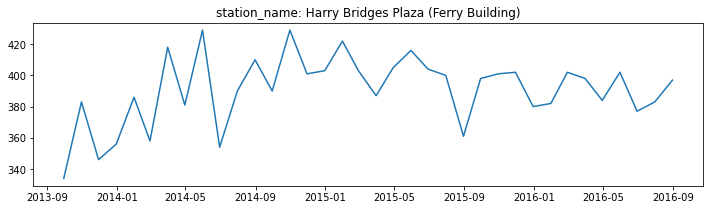

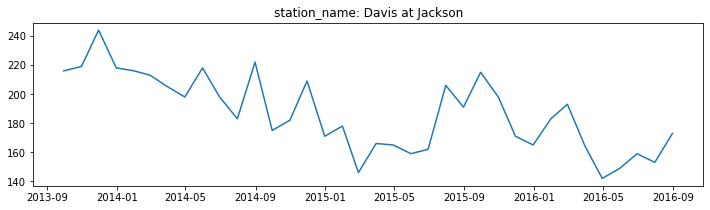

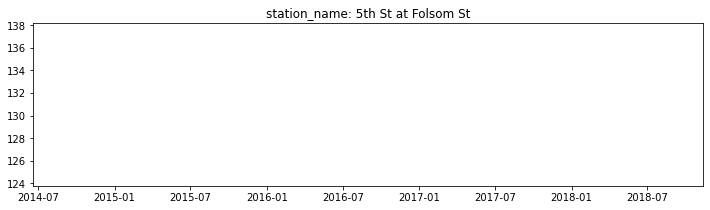

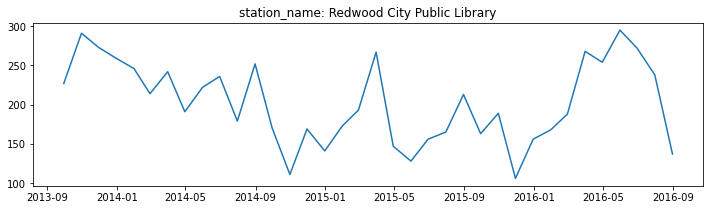

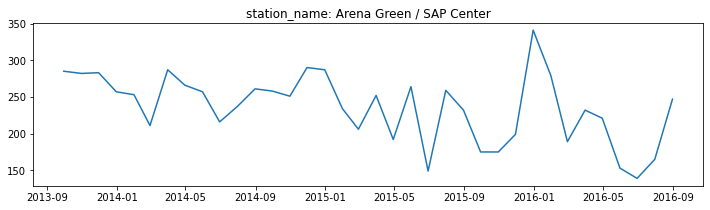

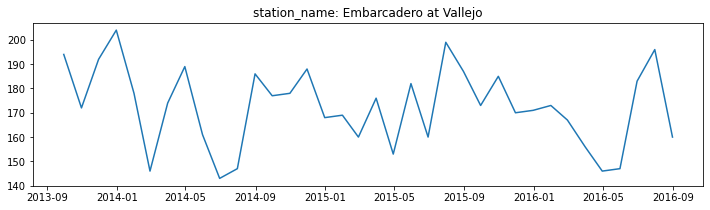

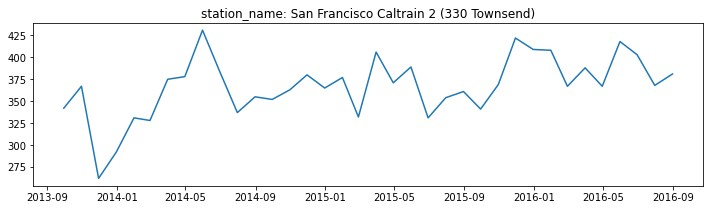

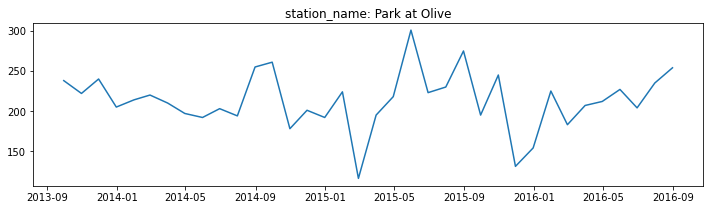

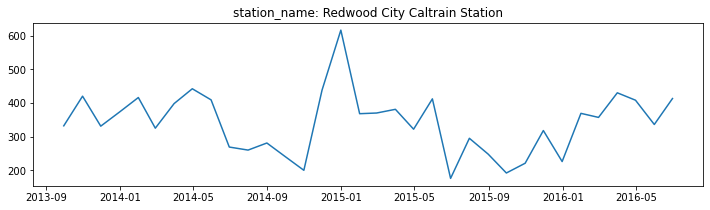

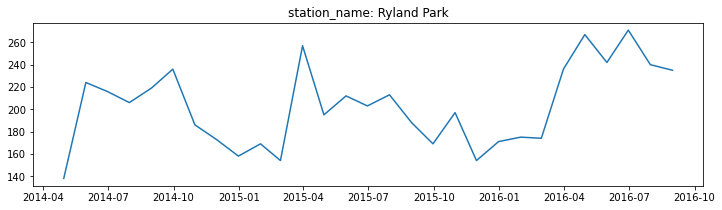

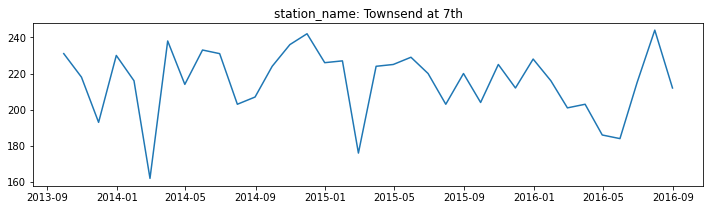

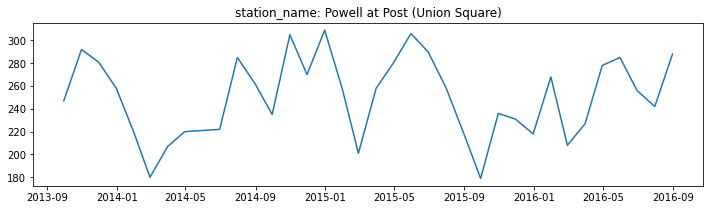

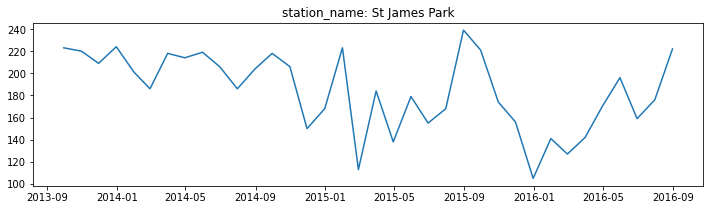

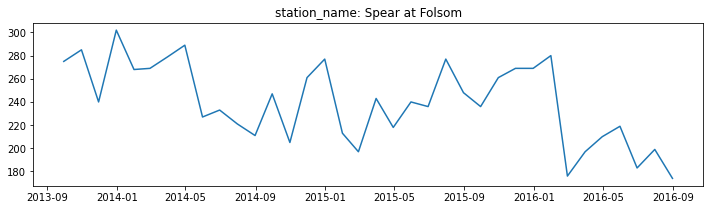

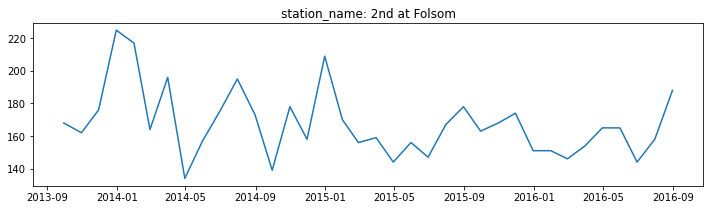

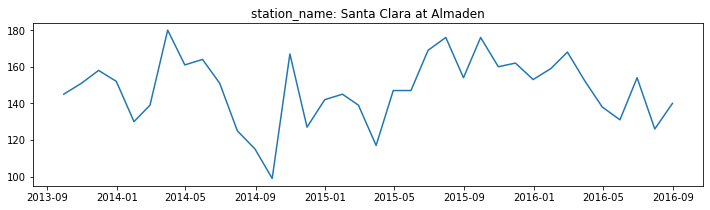

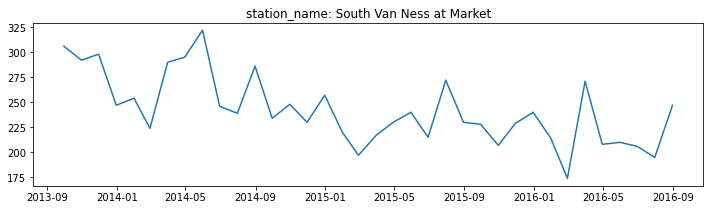

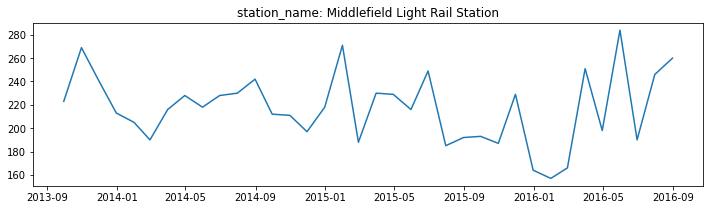

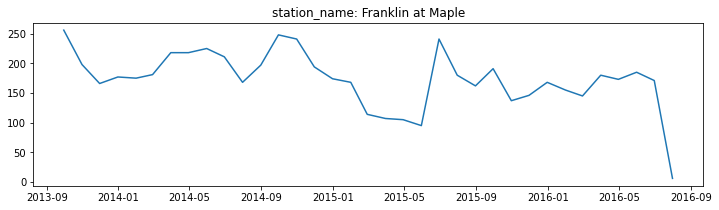

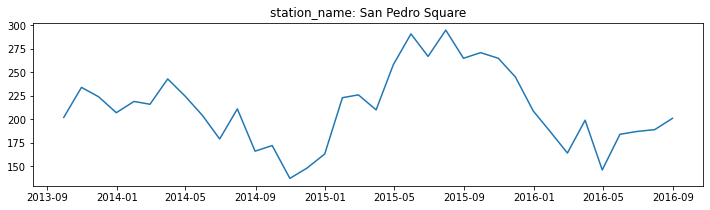

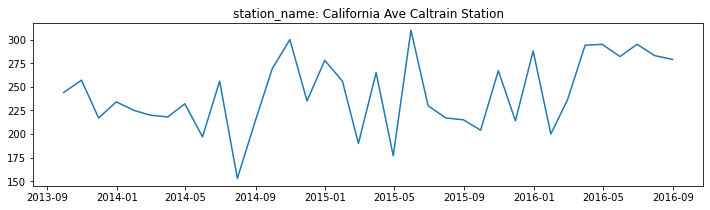

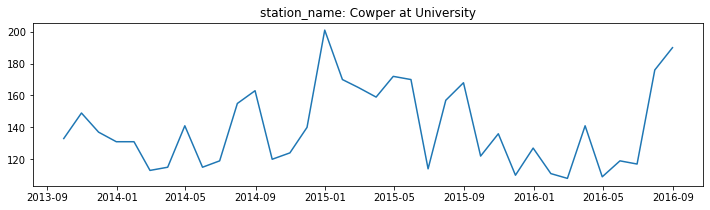

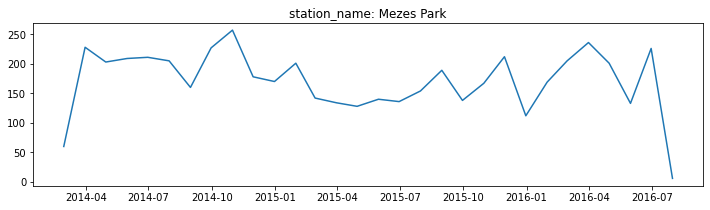

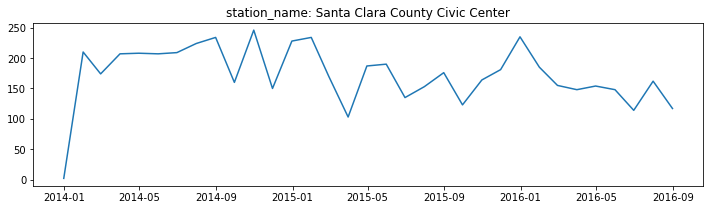

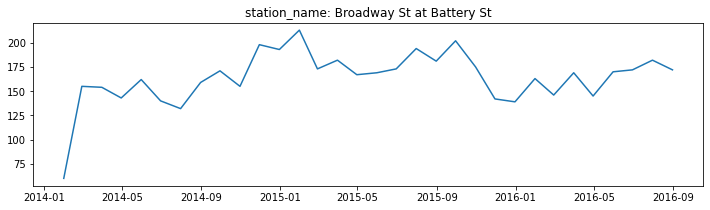

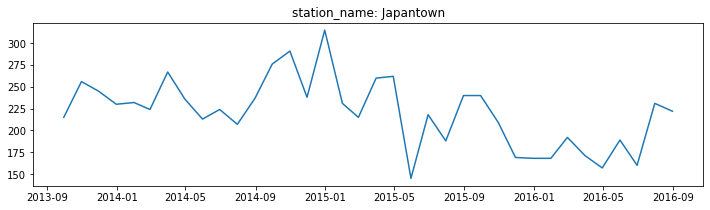

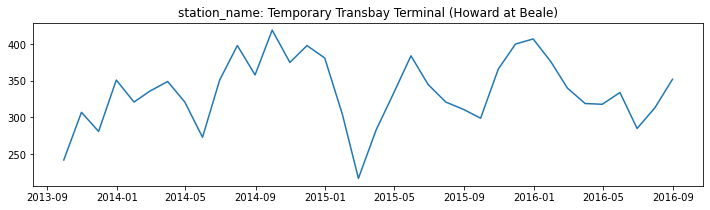

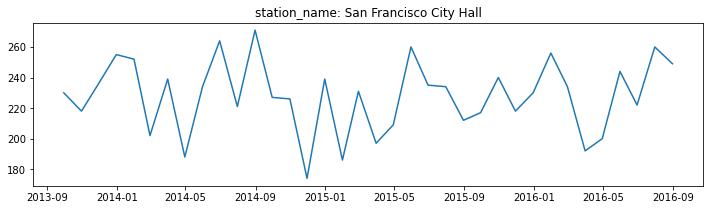

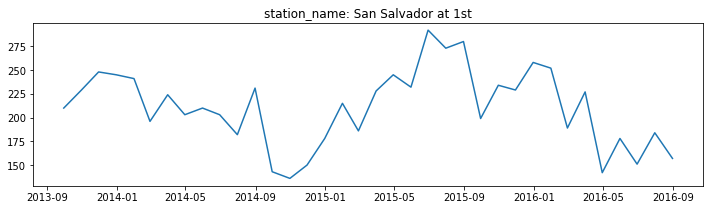

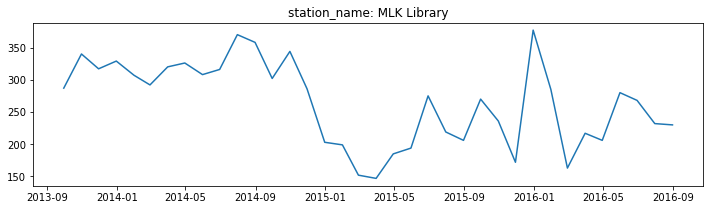

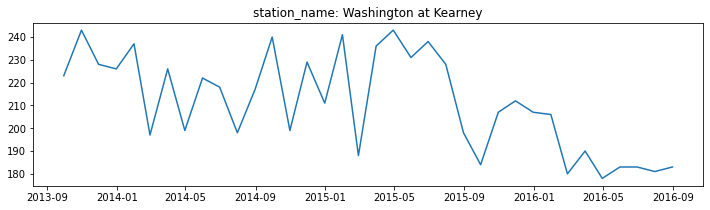

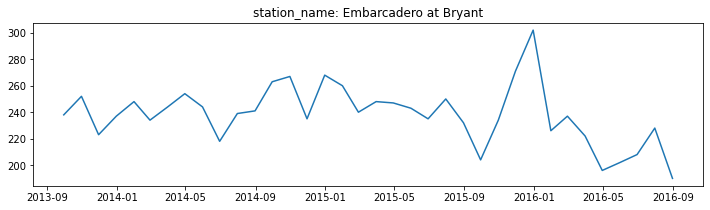

In [ ]:
for c in set(df['name']):
    fig = plt.figure(figsize=(12,3))
    plt.plot(df[(df['name']==c) & (df['date']>='2013-09-01')].set_index('date')['bikes_available'].resample('M').sum())
    plt.title('station_name: %s' %(c))

# Examine Empty Plot

In [ ]:
df[df['name']=='5th St at Folsom St']

,date,station_id,name,bikes_available,docks_available
75738,2016-08-24,90,5th St at Folsom St,18,12
75739,2016-08-25,90,5th St at Folsom St,16,14
75740,2016-08-26,90,5th St at Folsom St,16,14
75741,2016-08-27,90,5th St at Folsom St,23,7
75742,2016-08-28,90,5th St at Folsom St,20,10
75743,2016-08-29,90,5th St at Folsom St,13,17
75744,2016-08-30,90,5th St at Folsom St,9,21
75745,2016-08-31,90,5th St at Folsom St,16,14


In [ ]:
df[df['name']=='5th S. at E. San Salvador St']

,date,station_id,name,bikes_available,docks_available
75722,2016-08-24,88,5th S. at E. San Salvador St,9,8
75723,2016-08-25,88,5th S. at E. San Salvador St,9,10
75724,2016-08-26,88,5th S. at E. San Salvador St,9,10
75725,2016-08-27,88,5th S. at E. San Salvador St,9,10
75726,2016-08-28,88,5th S. at E. San Salvador St,9,10
75727,2016-08-29,88,5th S. at E. San Salvador St,9,10
75728,2016-08-30,88,5th S. at E. San Salvador St,9,10
75729,2016-08-31,88,5th S. at E. San Salvador St,8,10


# In Each Month, Which Stations Have the Most Bikes Available

In [ ]:
info = df.set_index('date').groupby('name').resample('M')['bikes_available'].sum().reset_index()
info[info['date']=='2014-02-28']

,name,date,bikes_available
6,2nd at Folsom,2014-02-28,164
43,2nd at South Park,2014-02-28,180
80,2nd at Townsend,2014-02-28,383
119,5th at Howard,2014-02-28,204
156,Adobe on Almaden,2014-02-28,282
...,...,...,...
2380,Temporary Transbay Terminal (Howard at Beale),2014-02-28,336
2417,Townsend at 7th,2014-02-28,162
2454,University and Emerson,2014-02-28,171
2491,Washington at Kearney,2014-02-28,197


In [ ]:
info_max = info.groupby(['date'])['bikes_available'].max()
max_station = pd.merge(info,info_max,on=['date','bikes_available'])
max_station.sort_values(by='date')

,name,date,bikes_available
10,Civic Center BART (7th at Market),2013-08-31,50
30,San Jose Diridon Caltrain Station,2013-09-30,372
31,San Jose Diridon Caltrain Station,2013-10-31,467
32,San Jose Diridon Caltrain Station,2013-11-30,380
28,San Antonio Caltrain Station,2013-12-31,400
23,Redwood City Caltrain Station,2014-01-31,416
16,Market at Sansome,2014-02-28,413
12,Harry Bridges Plaza (Ferry Building),2014-03-31,418
24,Redwood City Caltrain Station,2014-04-30,442
29,San Francisco Caltrain 2 (330 Townsend),2014-05-31,431


<AxesSubplot:xlabel='count', ylabel='name'>

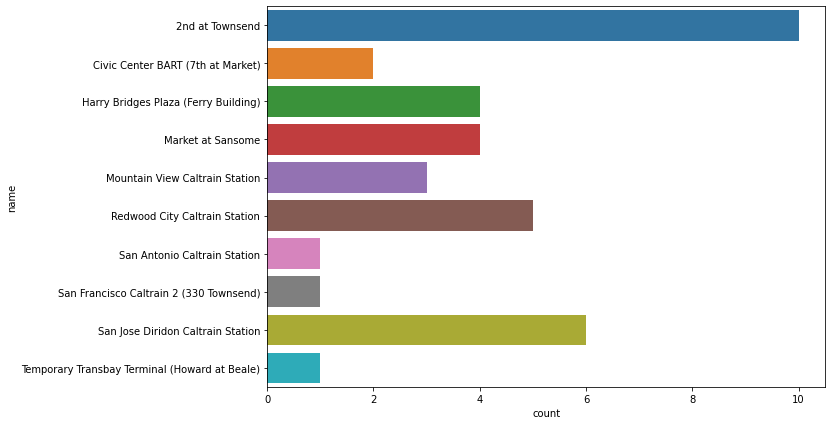

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y=max_station['name'])